In [33]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf
import sys
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
%matplotlib inline
# np행렬 생략 부분 출력 펼쳐서 보기 옵션
np.set_printoptions(threshold=np.inf, linewidth=np.inf) 

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()
print(len(train_X), len(test_X))

4423680/4422102 [==============================] - 0s 0us/step
60000 10000


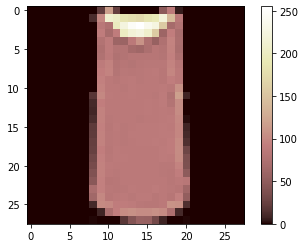

정답범주 0


In [3]:
plt.imshow(train_X[2], cmap='pink')
plt.colorbar()
plt.show()
print('정답범주', train_Y[2])

In [4]:
print(train_X[2].shape)
print(test_X[2].shape)
print(test_X[[2]].shape)
print(test_X)

(28, 28)
(28, 28)
(1, 28, 28)
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [5]:
train_X = train_X / 255.0
test_X = test_X / 255.0
print(train_X[2])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.08627451 0.4627451  0.09411765
  0.         0.         0.         0.         0.         0.18823529
  0.34509804 0.01960784 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.04705882 0.39215686 0.83137255 0.80392157
  0.7254902  0.70196078 0.67843137 0.72941176 0.75686275 0.86666667
  0.55686275 0.33333333 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.33333333 0.29803922 0.78039216
  0.88235294 0.97254902 1.         0.93333333 0.88627451 0.61568627
  0.26666667 0.31372549 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.     

In [6]:
# 다층 퍼셉트론
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

In [ ]:
# 밑에 vggnet 모방 코드 사용 하려면 여기 셀 실행 해야함/ input 을 맞춰주기 위함.

print(train_X.shape, test_X.shape)
# (미니배치크기, 입력이미지행수, 입력이미지열수, 입력이미지체널수)
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)
print(train_X.shape, test_X.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


In [ ]:
# vggnet 모방 모델
model= tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(3,3),filters=32,padding='same',activation='relu'),
    tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(3,3),filters=64,padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D(strides = (2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters = 128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters = 256, padding = 'valid', activation='relu'),
    tf.keras.layers.MaxPool2D(strides = (2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation = 'relu'),
    tf.keras.layers.Dropout(rate = 0.5),
    tf.keras.layers.Dense(units=256, activation = 'relu'),
    tf.keras.layers.Dropout(rate = 0.5),
    tf.keras.layers.Dense(units=10, activation = 'softmax')
])

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(train_X, train_Y, epochs=500, validation_split=0.25,
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss')])

Epoch 1/500
1407/1407 [==============================] - 3s 2ms/step - loss: 0.5191 - accuracy: 0.8186 - val_loss: 0.4550 - val_accuracy: 0.8371
Epoch 2/500
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3880 - accuracy: 0.8597 - val_loss: 0.4401 - val_accuracy: 0.8379
Epoch 3/500
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3460 - accuracy: 0.8757 - val_loss: 0.3570 - val_accuracy: 0.8699
Epoch 4/500
1407/1407 [==============================] - 2s 2ms/step - loss: 0.3211 - accuracy: 0.8811 - val_loss: 0.3508 - val_accuracy: 0.8741
Epoch 5/500
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2997 - accuracy: 0.8896 - val_loss: 0.3406 - val_accuracy: 0.8756
Epoch 6/500
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2840 - accuracy: 0.8948 - val_loss: 0.3376 - val_accuracy: 0.8783
Epoch 7/500
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2724 - accuracy: 0.9000 - val_loss: 0.3288 - val_ac

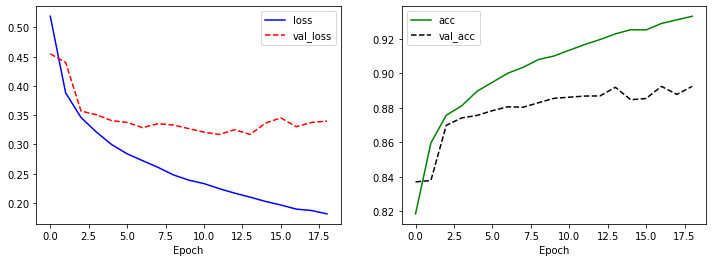

In [10]:
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label = 'loss')
plt.plot(history.history['val_loss'],'r--',label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label = 'acc')
plt.plot(history.history['val_accuracy'],'k--',label = 'val_acc')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [11]:
model.evaluate(test_X,test_Y)

313/313 [==============================] - 0s 925us/step - loss: 0.3744 - accuracy: 0.8837


[0.3743975758552551, 0.8837000131607056]

In [ ]:
# 예측수행 부분... 우리가 가지고 있는 사진을 넣었을때, 이 이미지에 대한 예측 범주 출력
# 수업시간때는, 테스트 데이터 안의 사진을 가지고 수행하였다.
# 이미지 불러오는 방법 찾아보기
# 불러온 이미지 변수에 담아서, model.predict(변수명)
# 예측 수행 범주 확인해주기.

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1751: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


(221, 195, 3)
########################################
VERSION : 1.1 
 Interesting tools to be added to the workflow pipe!!!
########################################


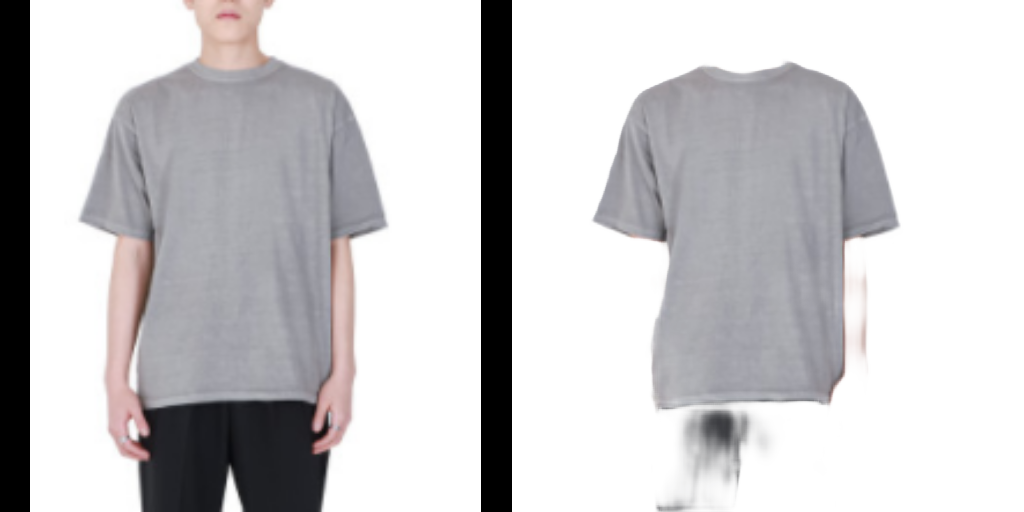

In [31]:
# 모델 임포트 후 의상 부분만 추출하는 코드.

# GPU메모리 증가 허용하기 코드..내가 알아야할 필요가 있을지..? 뭔 이야기인지는 모르겠음.
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

# 이미지를 계속해서 바꿔바며 할수 있는 방법을 생각해야함 요기 f는 경로 입력.
f = '/content/반팔티예시.png'
# 훈련된 모델 가지고 오는 경로 설정.
saved = load_model("/content/drive/My Drive/Colab Notebooks/데이터/topwears.h5")

class fashion_tools(object):
    def __init__(self,imageid,model,version=1.1):
        self.imageid = imageid
        self.model   = model
        self.version = version
        
    def get_dress(self,stack=False):
        """limited to top wear and full body dresses (wild and studio working)"""
        """takes input rgb----> return PNG"""

        name =  self.imageid
        file = cv2.imread(name)
        print(file.shape)
        # b,g,r= cv2.split(file)
        # file = cv2.merge([b,g,r])

        file = tf.image.resize_with_pad(file,target_height=512,target_width=512)
        rgb  = file.numpy()
        file = np.expand_dims(file,axis=0)/ 255.
        seq = self.model.predict(file)
        seq = seq[3][0,:,:,0]
        seq = np.expand_dims(seq,axis=-1)
        c1x = rgb*seq
        c2x = rgb*(1-seq)
        cfx = c1x+c2x
        dummy = np.ones((rgb.shape[0],rgb.shape[1],1))
        rgbx = np.concatenate((rgb,dummy*255),axis=-1)
        rgbs = np.concatenate((cfx,seq*255.),axis=-1)
        if stack:
            stacked = np.hstack((rgbx,rgbs))
            return stacked
        else:
            return rgbs
        
    def get_patch(self):
        return None

    def development(self):
        n_ = '\n'
        return (f"VERSION : {self.version} {n_} Interesting tools to be added to the workflow pipe!!!")

###running code
api    = fashion_tools(f,saved)
image = api.get_dress(True)

print("########################################")
print(api.development())
print("########################################")

# cv2.imwrite('result.jpeg', image_)
cv2_imshow(image)
# print(image.shape)

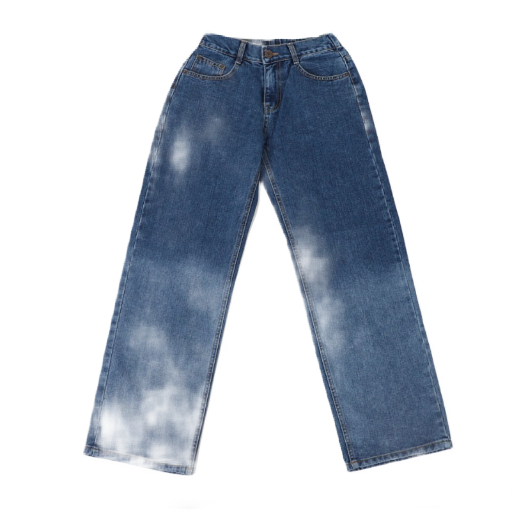

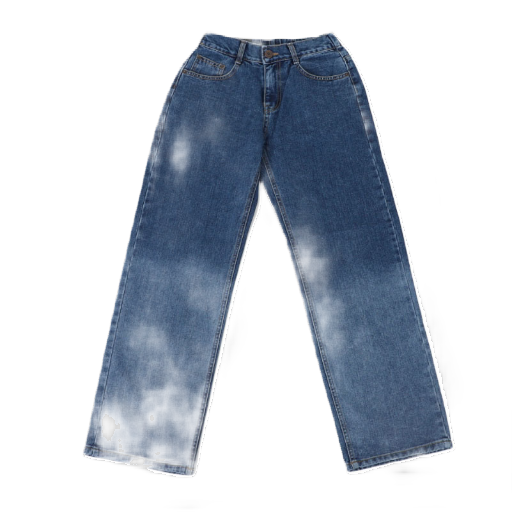

In [24]:
# 이미지 자르고, 투명값 검정배경 입혀주기.

image_crop = image[:,512:]
image_crop = np.uint8(image_crop)
# print(image_crop.shape)
cv2_imshow(image_crop)
# print(image_crop[0])
for i in image_crop:
    for j in i:
        if j[3] < 40:
            j[0] = 0
            j[1] = 0
            j[2] = 0

cv2_imshow(image_crop)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  91  57  20  99  59  76  78 101   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  80  99  79  68  95  42  66  63  83 234   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  77  78  70  56  63  84  65  59  58  67  37   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  89  69  67  59  62  60  57  61  74  58  43   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  73  65  55  64  68  60  52  64  64  63  66 254   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  53  71  67  64  58  66  41  55  62  58  59  62  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  90  66  67  68  58  63  38  57  54  55  55  6

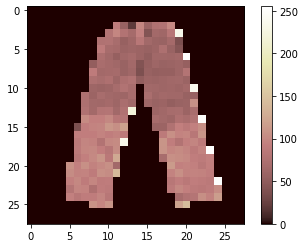

In [34]:
# 리사이즈 인풋값 맞춰 주기.
image_resize = cv2.resize(image_crop, (28,28))
cv2_imshow(image_resize)

# 그레이 스케일.. 후 픽셀 출력..
image_gray = cv2.cvtColor(image_resize, cv2.COLOR_BGRA2GRAY)
cv2_imshow(image_gray)
print(image_gray)

# 조금 더 크게 시각화..
plt.imshow(image_gray, cmap='pink')
plt.colorbar()
plt.show()

In [32]:
# 정규화 해준다.
input_image = image_gray/255.0
# print(input_image.shape)
# print(input_image)

In [27]:
# input값이 3차원 이여서 차원을 늘려준다.
input_image = np.reshape(input_image, (1,28,28))
input_image.shape
# input_image

(1, 28, 28)

In [ ]:
# 예측 범주
# 0 : 티셔츠 / 상의
# 1 : 바지
# 2 : 스웨터
# 3 : 드레스
# 4 : 코트
# 5 : 샌들
# 6 : 셔츠
# 7 : 운동화
# 8 : 가방
# 9 : 부츠

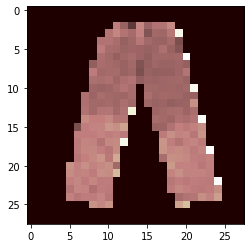

[[1.0002859 1.000071  1.0073811 1.0000309 1.1004515 1.8788887 1.0009948
  1.0000008 1.0118953 1.       ]]


In [28]:
#예측 수행
pred_X = model.predict(input_image)
#예측 이미지 확인 
plt.imshow(input_image.reshape(28,28), cmap = 'pink')
plt.show()

#예측 결과 확인 
print(pred_X+1)